# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [621]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [622]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [623]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract relevant information from JSON response
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | fort st. john
Processing Record 3 of Set 1 | lembar
City not found. Skipping...
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | ust-kamenogorsk
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | malango
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | rongelap
Processing Record 12 of Set 1 | prince rupert
Processing Record 13 of Set 1 | jijiga
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | lubao
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | la peca
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | alesun

Processing Record 39 of Set 4 | shiqian
Processing Record 40 of Set 4 | mata-utu
Processing Record 41 of Set 4 | morant bay
Processing Record 42 of Set 4 | kuacjok
Processing Record 43 of Set 4 | calvinia
Processing Record 44 of Set 4 | puerto santa
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | constantia
Processing Record 47 of Set 4 | colonia
Processing Record 48 of Set 4 | griffith
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | utrik
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | cotonou
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | san antonio del estrecho
City not found. Skipping...
Processing Record 6 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 7 of Set 5 | peniche
Processing Record 8 of Set 5 | samana
Processing Record 9 of Set 5 | port saint john's
Processing Record 10 of Set 5 | hengchun
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | ridder
Processing Record 32 of Set 8 | birpur
Processing Record 33 of Set 8 | yangor
City not found. Skipping...
Processing Record 34 of Set 8 | palikir - national government center
Processing Record 35 of Set 8 | bryne
Processing Record 36 of Set 8 | yen bai
Processing Record 37 of Set 8 | magong
Processing Record 38 of Set 8 | great falls
Processing Record 39 of Set 8 | tchintabaraden
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | conduaga
Processing Record 42 of Set 8 | ghat
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | viedma
Processing Record 45 of Set 8 | gisborne
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | aykol
City not found. Skipping...
Processing Record 50 of Set 8 | kohtla-jarve
Processing Record 1 of Set 9 | guiria
City not found. Skipping...
Processing Record 2 of Set 9 | saint

City not found. Skipping...
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | sao joao dos patos
Processing Record 22 of Set 12 | las lomitas
Processing Record 23 of Set 12 | baza
Processing Record 24 of Set 12 | los llanos de aridane
Processing Record 25 of Set 12 | makarov
Processing Record 26 of Set 12 | ta`u
Processing Record 27 of Set 12 | harstad
Processing Record 28 of Set 12 | fortuna
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | urzhar
Processing Record 31 of Set 12 | loralai
Processing Record 32 of Set 12 | salavan
Processing Record 33 of Set 12 | san pedro
Processing Record 34 of Set 12 | diapaga
Processing Record 35 of Set 12 | sarai naurang
Processing Record 36 of Set 12 | smithers
Processing Record 37 of Set 12 | njombe
Processing Record 38 of Set 12 | hastings
Processing Record 39 of Set 12 | arraias
Processing Record 40 of Set 12 | kalefeld
Processing Record 41 of Set 12 | tobi village
City not found. Skipping...


In [624]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            583
Lat             583
Lng             583
Max Temp (C)    583
Humidity        583
Cloudiness      583
Wind Speed      583
Country         583
Date            583
dtype: int64

In [625]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,28.06,75,96,1.71,MH,1697989755
1,fort st. john,56.2499,-120.8529,-4.06,93,100,4.12,CA,1697989755
2,saint-francois,46.4154,3.9054,15.69,65,0,1.03,FR,1697989756
3,longyearbyen,78.2186,15.6401,-9.09,79,20,4.12,SJ,1697989756
4,ust-kamenogorsk,49.9789,82.6103,11.96,82,100,5.00,KZ,1697989756


In [626]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [627]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.06,75,96,1.71,MH,1697989755
1,fort st. john,56.2499,-120.8529,-4.06,93,100,4.12,CA,1697989755
2,saint-francois,46.4154,3.9054,15.69,65,0,1.03,FR,1697989756
3,longyearbyen,78.2186,15.6401,-9.09,79,20,4.12,SJ,1697989756
4,ust-kamenogorsk,49.9789,82.6103,11.96,82,100,5.00,KZ,1697989756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

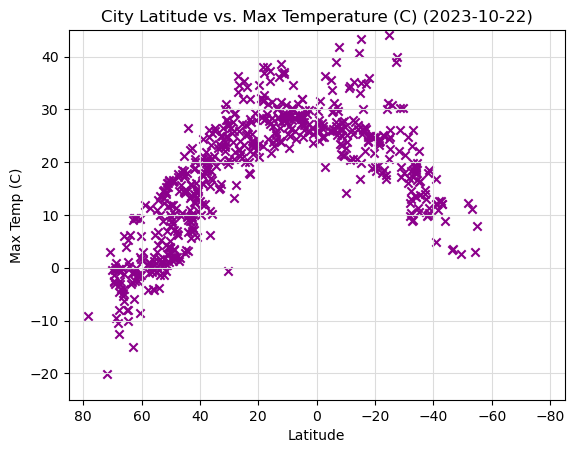

In [628]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], color = "darkmagenta", marker="x")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs. Max Temperature (C) (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(85, -85)
plt.ylim(-25, 45)

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude vs. Humidity

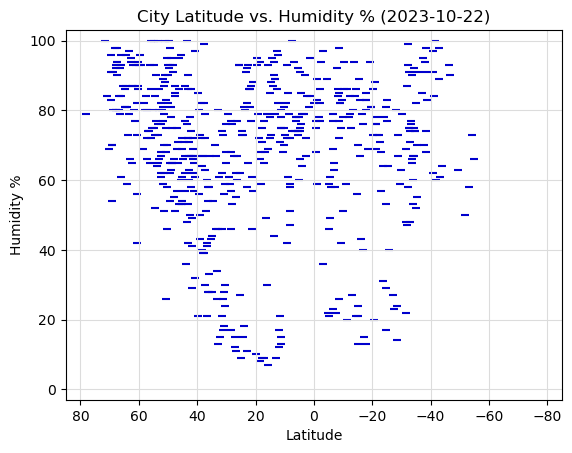

In [629]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "mediumblue", marker="_")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity % (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(85, -85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

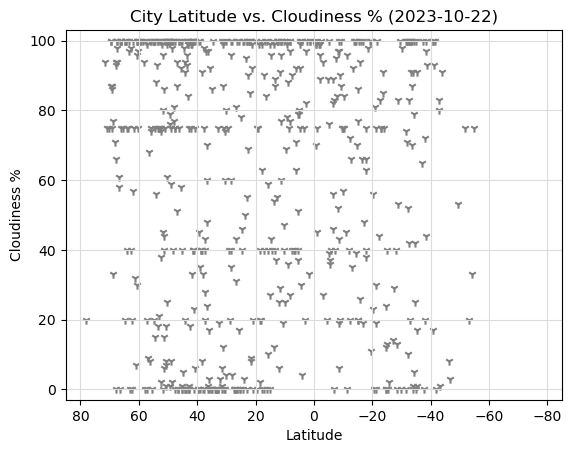

In [630]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "grey", marker="1")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness % (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(85, -85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

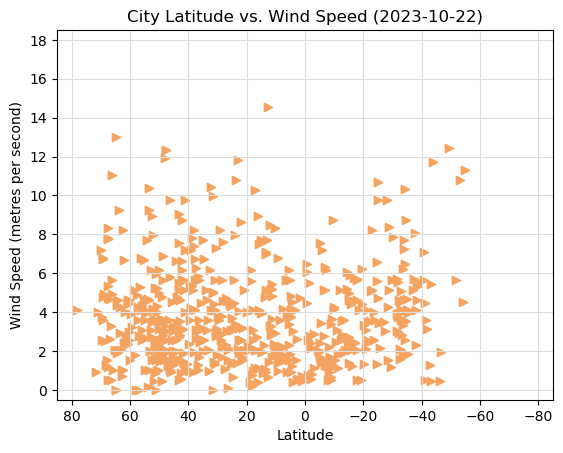

In [631]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "sandybrown", marker=">")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (metres per second)")
plt.title("City Latitude vs. Wind Speed (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(85, -85)
plt.ylim(-.5, 18.5)
plt.yticks(range(0, 20, 2))

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [632]:
# Define a function to create Linear Regression plots
def plot_linear_regression(northern_hemisphere, x_col, y_col):
    X = northern_hemisphere[x_col].values.reshape(-1, 1)
    Y = northern_hemisphere[y_col].values.reshape(-1, 1)

In [633]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.06,75,96,1.71,MH,1697989755
1,fort st. john,56.2499,-120.8529,-4.06,93,100,4.12,CA,1697989755
2,saint-francois,46.4154,3.9054,15.69,65,0,1.03,FR,1697989756
3,longyearbyen,78.2186,15.6401,-9.09,79,20,4.12,SJ,1697989756
4,ust-kamenogorsk,49.9789,82.6103,11.96,82,100,5.00,KZ,1697989756


In [634]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,coquimbo,-29.9533,-71.3436,17.85,63,0,5.66,CL,1697989756
6,port-aux-francais,-49.3500,70.2167,2.61,63,53,12.45,TF,1697989757
7,malango,-2.9627,119.9001,19.03,97,27,1.15,ID,1697989757
8,invercargill,-46.4000,168.3500,3.34,93,8,0.45,NZ,1697989664
14,atafu village,-8.5421,-172.5159,27.65,77,97,1.28,TK,1697989759


###  Temperature vs. Latitude Linear Regression Plot

In [635]:
### Northern Hemisphere Max Temp (C)

In [636]:
# Calculate the linear regression model for the Northern Hemisphere for Max Temp (C)
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp (C)"])

regress_values_north_temp = slope * northern_hemisphere["Lat"] + intercept
regress_values_north_temp.head()

City_ID
0    30.246824
1     5.036267
2    10.557858
3    -7.298083
4     8.557127
Name: Lat, dtype: float64

In [637]:
# Calculate the r-value for the Northern Hemisphere for Max Temp (C)
r_value_north_temp = pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Max Temp (C)"])[0]
r_value_north_temp

-0.8804619509069971

The r-value is -0.8804619509069971.


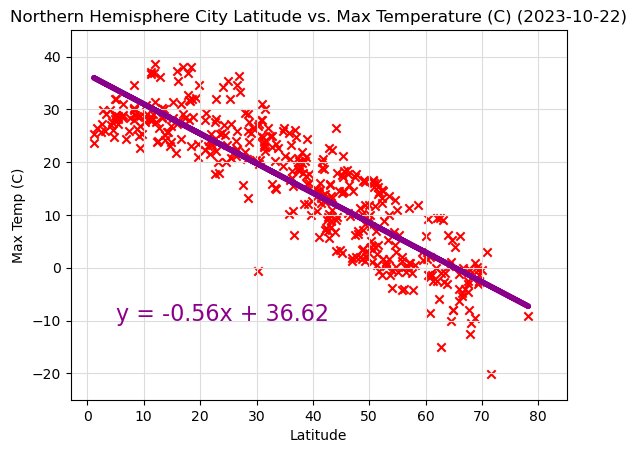

In [638]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_north_temp}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp (C)"], color = "red", marker="x")

# Plot the linear regression line
plt.plot(northern_hemisphere["Lat"], regress_values_north_temp, linewidth=4, color='darkmagenta')

# Annotate the linear regression formula on the graph
north_formula_temp = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(north_formula_temp, xy=(5, -10), fontsize=16, color='darkmagenta')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (C) (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(-3, 85)
plt.ylim(-25, 45)

# Save the figure
plt.savefig("output_data/Fig01a.png")

# Show plot
plt.show()

In [639]:
### Southern Hemisphere Max Temp (C)

In [640]:
# Calculate the linear regression model for the Southern Hemisphere for Max Temp (C)
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp (C)"])

regress_values_south_temp = slope * southern_hemisphere["Lat"] + intercept
regress_values_south_temp.head()

City_ID
5     18.849234
6     10.560719
7     30.382742
8     11.821300
14    27.998576
Name: Lat, dtype: float64

In [641]:
# Calculate the r-value for the Southern Hemisphere for Max Temp (C)
r_value_south_temp = pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Max Temp (C)"])[0]
r_value_south_temp

0.7023391261281292

The r-value is 0.7023391261281292.


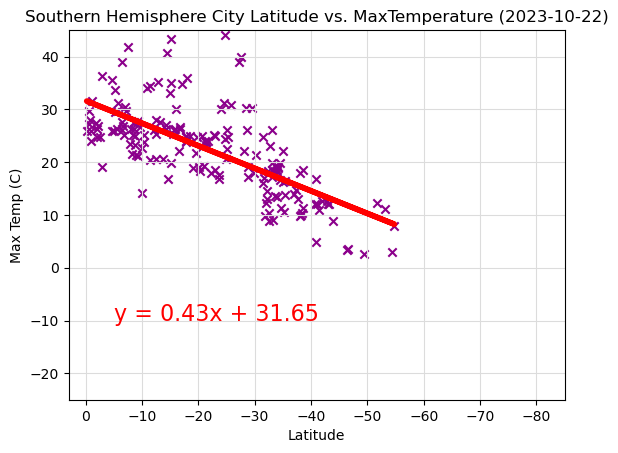

In [642]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_south_temp}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp (C)"], color = "darkmagenta", marker="x")

# Plot the linear regression line
plt.plot(southern_hemisphere["Lat"], regress_values_south_temp, linewidth=4, color='red')

# Annotate the linear regression formula on the graph
south_formula_temp = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(south_formula_temp, xy=(-5, -10), fontsize=16, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere City Latitude vs. MaxTemperature (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(3, -85)
plt.ylim(-25, 45)

# Save the figure
plt.savefig("output_data/Fig01b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The graphs are inversely proportional to one another. Temperatures increase as the Latitude gets closer to the Equator.

### Humidity vs. Latitude Linear Regression Plot

In [643]:
### Northern Hemisphere Humidity

In [644]:
# Calculate the linear regression model for the Northern Hemisphere for Humidity
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

regress_values_north_humidity = slope * northern_hemisphere["Lat"] + intercept
regress_values_north_temp.head()

City_ID
0    30.246824
1     5.036267
2    10.557858
3    -7.298083
4     8.557127
Name: Lat, dtype: float64

In [645]:
# Calculate the r-value for the Northern Hemisphere for Humidity
r_value_north_humidity = pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])[0]
r_value_north_humidity

0.21771629850591123

The r-value is 0.21771629850591123.


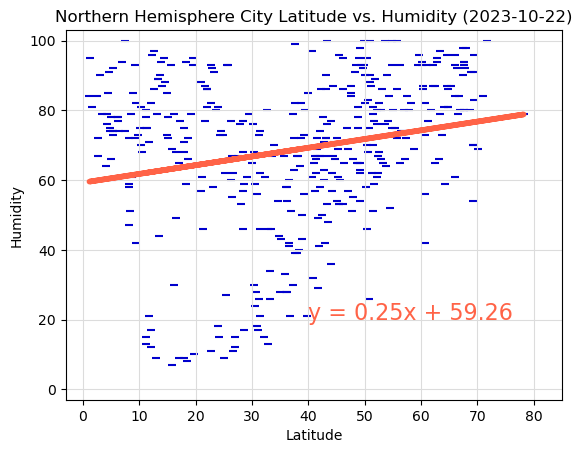

In [646]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_north_humidity}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], color = "mediumblue", marker="_")

# Plot the linear regression line
plt.plot(northern_hemisphere["Lat"], regress_values_north_humidity, linewidth=4, color='tomato')

# Annotate the linear regression formula on the graph
north_formula_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(north_formula_humidity, xy=(40, 20), fontsize=16, color='tomato')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(-3, 85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig02a.png")

# Show plot
plt.show()

In [647]:
### Southern Hemisphere Humidity

In [648]:
# Calculate the linear regression model for the Southern Hemisphere for Humidity
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

regress_values_south_humidity = slope * southern_hemisphere["Lat"] + intercept
regress_values_south_humidity.head()

City_ID
5     69.004232
6     72.073659
7     64.733109
8     71.606836
14    65.616020
Name: Lat, dtype: float64

In [649]:
# Calculate the r-value for the Southern Hemisphere for Humidity
r_value_south_humidity = pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])[0]
r_value_south_humidity

-0.09643885611999299

The r-value is -0.09643885611999299.


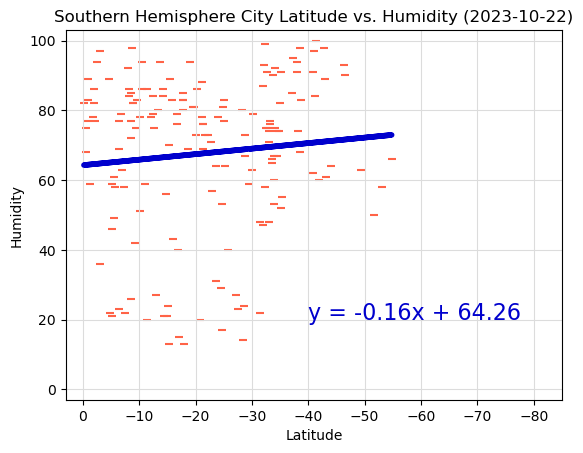

In [650]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_south_humidity}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], color = "tomato", marker="_")

# Plot the linear regression line
plt.plot(southern_hemisphere["Lat"], regress_values_south_humidity, linewidth=4, color='mediumblue')

# Annotate the linear regression formula on the graph
south_formula_humidity = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(south_formula_humidity, xy=(-40, 20), fontsize=16, color='mediumblue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs. Humidity (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(3, -85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig02b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The data show that humidity is lowest at the equator, and increases the further away from the equator that the city's latitude is.

### Cloudiness vs. Latitude Linear Regression Plot

In [651]:
### Northern Hemisphere Cloudiness

In [652]:
# Calculate the linear regression model for the Northern Hemisphere for Cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

regress_values_north_cloudiness = slope * northern_hemisphere["Lat"] + intercept
regress_values_north_cloudiness.head()

City_ID
0    56.257433
1    62.142282
2    60.853388
3    65.021464
4    61.320415
Name: Lat, dtype: float64

In [653]:
# Calculate the r-value for the Northern Hemisphere for Cloudiness
r_value_north_cloudiness = pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])[0]
r_value_north_cloudiness

0.06450905102404718

The r-value is 0.06450905102404718.


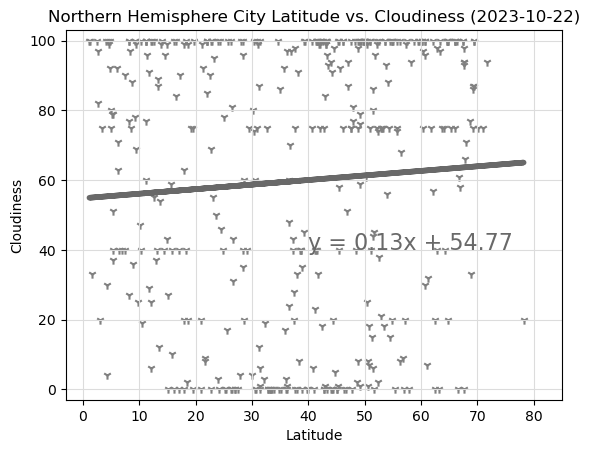

In [654]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_north_cloudiness}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], color = "grey", marker="1")

# Plot the linear regression line
plt.plot(northern_hemisphere["Lat"], regress_values_north_cloudiness, linewidth=4, color='dimgray')

# Annotate the linear regression formula on the graph
north_formula_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(north_formula_cloudiness, xy=(40, 40), fontsize=16, color='dimgray')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(-3, 85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig03a.png")

# Show plot
plt.show()

In [655]:
### Southern Hemisphere Cloudiness

In [656]:
# Calculate the r-value for the Southern Hemisphere for Cloudiness
r_value_south_cloudiness = pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])[0]
r_value_south_cloudiness

0.15161239371376906

In [657]:
# Calculate the linear regression model for the Southern Hemisphere for Cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

regress_values_south_cloudiness = slope * southern_hemisphere["Lat"] + intercept
regress_values_south_cloudiness.head()

City_ID
5     56.662081
6     48.883388
7     67.486168
8     50.066432
14    65.248651
Name: Lat, dtype: float64

The r-value is 0.15161239371376906.


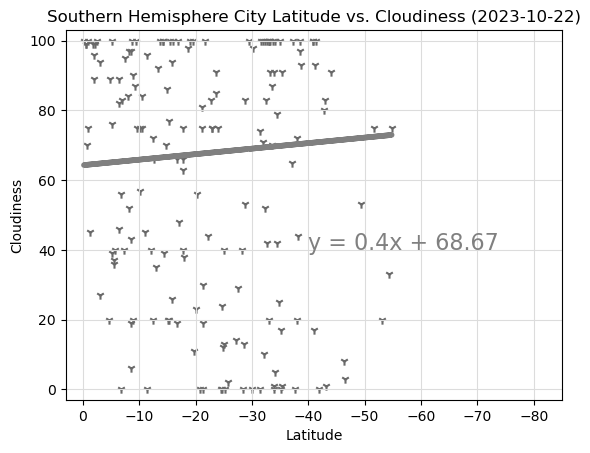

In [658]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_south_cloudiness}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], color = "dimgrey", marker="1")

# Plot the linear regression line
plt.plot(southern_hemisphere["Lat"], regress_values_south_humidity, linewidth=4, color='grey')

# Annotate the linear regression formula on the graph
south_formula_cloudiness = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(south_formula_cloudiness, xy=(-40, 40), fontsize=16, color='grey')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(3, -85)
plt.ylim(-3, 103)

# Save the figure
plt.savefig("output_data/Fig03b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The data show that cloudiness is lowest at the equator, and increases the further away from the equator that the city's latitude is.

### Wind Speed vs. Latitude Linear Regression Plot

In [659]:
### Northern Hemisphere Wind Speed

In [660]:
# Calculate the linear regression model for the Northern Hemisphere for Cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

regress_values_north_wind = slope * northern_hemisphere["Lat"] + intercept
regress_values_north_wind.head()

City_ID
0    3.447755
1    3.915667
2    3.813186
3    4.144595
4    3.850319
Name: Lat, dtype: float64

In [661]:
# Calculate the r-value for the Northern Hemisphere for Cloudiness
r_value_north_wind = pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])[0]
r_value_north_wind

0.07792725706898108

The r-value is 0.07792725706898108.


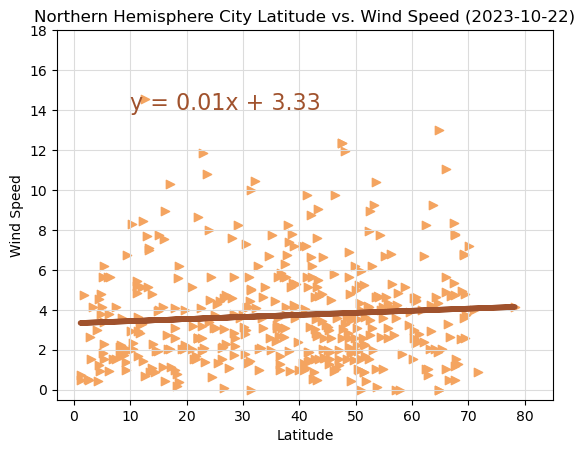

In [662]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_north_wind}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], color = "sandybrown", marker=">")

# Plot the linear regression line
plt.plot(northern_hemisphere["Lat"], regress_values_north_wind, linewidth=4, color='sienna')

# Annotate the linear regression formula on the graph
north_formula_wind = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(north_formula_wind, xy=(10, 14), fontsize=16, color='sienna')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(-3, 85)
plt.ylim(-.5, 18)
plt.yticks(range(0, 20, 2))

# Save the figure
plt.savefig("output_data/Fig04a.png")

# Show plot
plt.show()

In [663]:
### Southern Hemisphere Wind Speed

In [664]:
# Calculate the linear regression model for the Northern Hemisphere for Cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

regress_values_south_wind = slope * southern_hemisphere["Lat"] + intercept
regress_values_south_wind.head()

City_ID
5     4.491964
6     5.805545
7     2.664109
8     5.605765
14    3.041957
Name: Lat, dtype: float64

In [665]:
# Calculate the r-value for the Northern Hemisphere for Cloudiness
r_value_south_wind = pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])[0]
r_value_south_wind

-0.3680795056907095

The r-value is -0.3680795056907095.


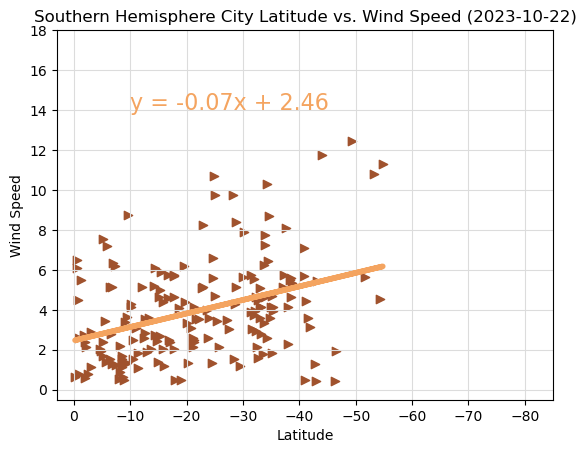

In [666]:
# Print the r-value at top of graph
print(f"The r-value is {r_value_south_wind}.")

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], color = "sienna", marker=">")

# Plot the linear regression line
plt.plot(southern_hemisphere["Lat"], regress_values_south_wind, linewidth=4, color='sandybrown')

# Annotate the linear regression formula on the graph
south_formula_wind = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(south_formula_wind, xy=(-10, 14), fontsize=16, color='sandybrown')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (2023-10-22)")
plt.grid(color="gainsboro")

# Set axes scales
plt.xlim(3, -85)
plt.ylim(-.5, 18)
plt.yticks(range(0, 20, 2))

# Save the figure
plt.savefig("output_data/Fig04b.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Data from both hemispheres reflect that windspeed is lowest at the Equator, and that wind speed increases as the distance from the Equator increases. Wind speeds increase at a faster rate in the Southern Hemisphere than they do in the Northern Hemisphere.